In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:
data=pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
# Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [7]:
def define_variable(df, unique_value_max=10):
    categorical = []
    num_continuous = []
    num_discrete = []
    for i in df.columns:
        if df[i].dtype == object:
           
            categorical.append(i)
        else:
            if df[i].nunique() > unique_value_max:
               
                num_continuous.append(i)
            else:
               
                num_discrete.append(i)
             
       
    return df[categorical], df[num_continuous], df[num_discrete]
cat_features, num_continuous_features, num_discrete_features = define_variable(data)
cat_features2, num_continuous_features2, num_discrete_features2 = define_variable(cat_features) 
display(cat_features.head())
display(num_continuous_features)
display(num_discrete_features)


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


,Number of Open Complaints,Number of Policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


In [8]:
categorical = cat_features
discrete_df = num_discrete_features
continuous_df = num_continuous_features
categorical.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


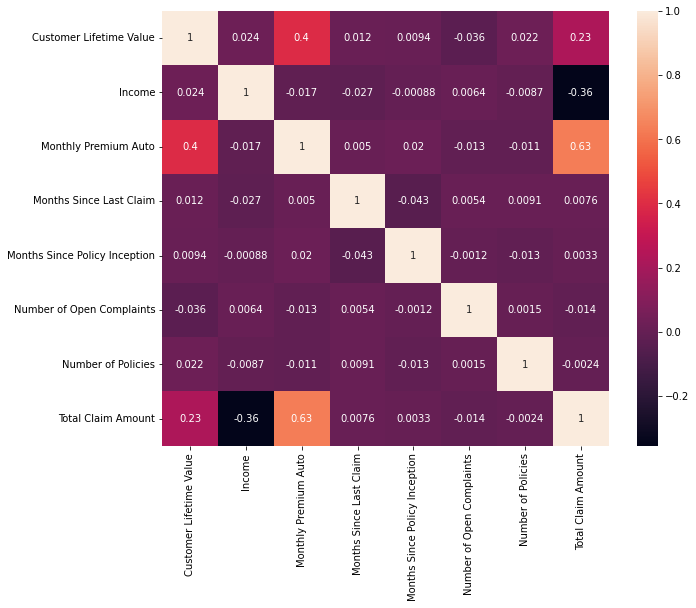

In [9]:
# Plot a correlation matrix
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()
# There are not high correlated column because the highst correlation is 0.64

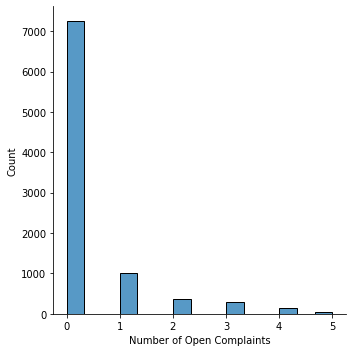

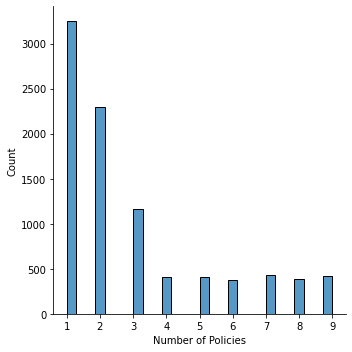

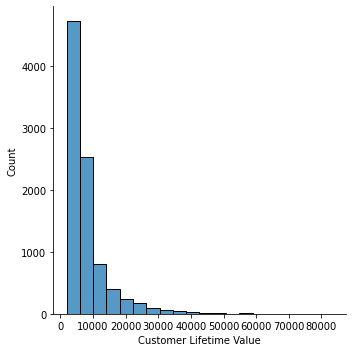

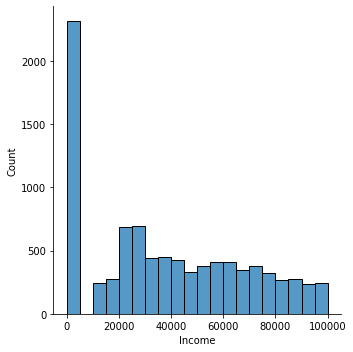

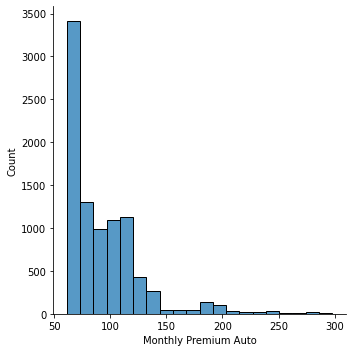

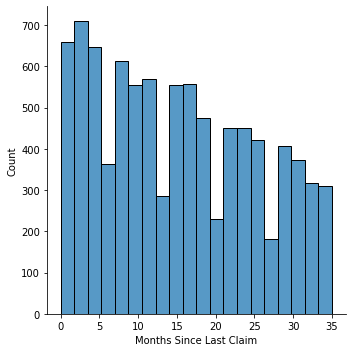

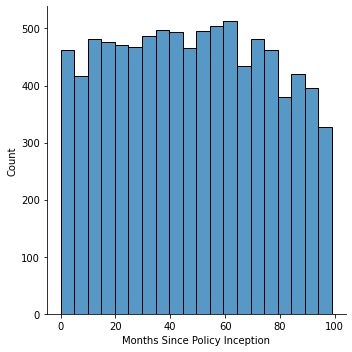

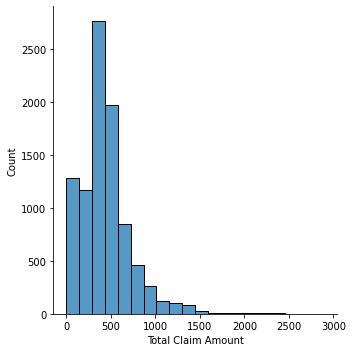

In [10]:
# Create a function to plot every discrete variables. Do the same with continuous variables
def discrete():
    for column in discrete_df.columns:
        sns.displot(discrete_df[column])
        plt.show()
discrete()

def continuous():
    for column in continuous_df.columns:
        sns.displot(continuous_df[column], bins = 20)
        plt.show()
continuous()

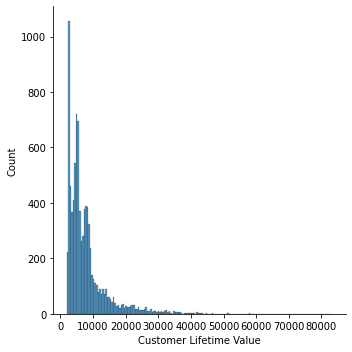

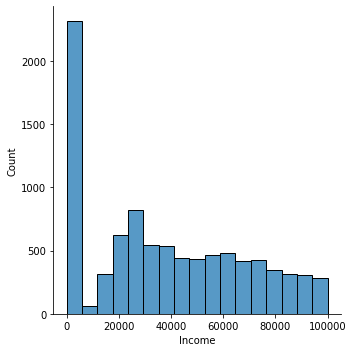

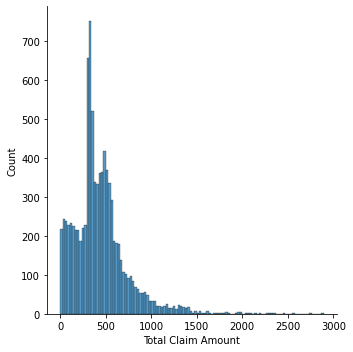

In [11]:

sns.displot(data['Customer Lifetime Value'])
plt.show()

sns.displot(data['Income'])
plt.show()

sns.displot(data['Total Claim Amount'])
plt.show()

In [ ]:
# What can you see in the plots?
# customer lifetime value- there is a outlier. 
# monthly premium auto - there is a outlier. 
# total claim amount - there is a outlier. 

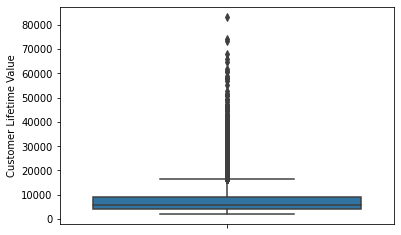

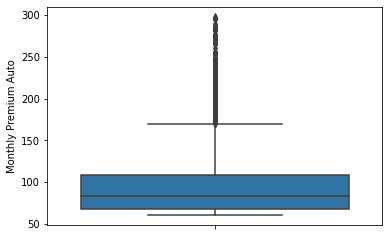

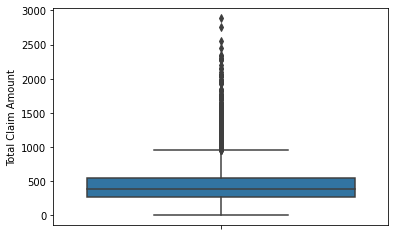

In [12]:
# Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
sns.boxplot(y=continuous_df['Customer Lifetime Value'])
plt.show()
sns.boxplot(y=continuous_df['Monthly Premium Auto'])
plt.show()
sns.boxplot(y=continuous_df['Total Claim Amount'])
plt.show()

In [13]:
# Have you found outliers? If you have, what should we do with them?

iqr = np.percentile(data['Customer Lifetime Value'],75) - np.percentile(data['Customer Lifetime Value'],25)
upper_limit = np.percentile(data['Customer Lifetime Value'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = data[data['Customer Lifetime Value'] > upper_limit]
len(extraordinary_points)  # THis checks the number of points that will be removed  

16414.039911750002


817

In [ ]:
data = data[data['Customer Lifetime Value'] < upper_limit]

<AxesSubplot:>

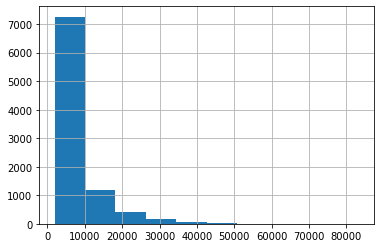

In [14]:
data['Customer Lifetime Value'].hist()

In [15]:
# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(data['Monthly Premium Auto'],75) - np.percentile(data['Monthly Premium Auto'],25)
upper_limit = np.percentile(data['Monthly Premium Auto'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = data[data['Monthly Premium Auto'] > upper_limit]
len(extraordinary_points)  # THis checks the number of points that will be removed

170.5


430

<AxesSubplot:>

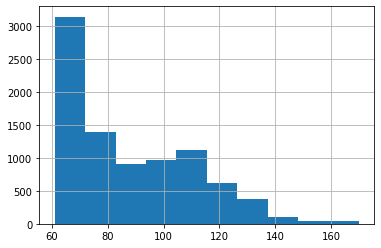

In [16]:
data = data[data['Monthly Premium Auto'] < upper_limit]
data['Monthly Premium Auto'].hist()

In [17]:
# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(data['Total Claim Amount'],75) - np.percentile(data['Total Claim Amount'],25)
upper_limit = np.percentile(data['Total Claim Amount'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = data[data['Total Claim Amount'] > upper_limit]
len(extraordinary_points)  # THis checks the number of points that will be removed

927.1041825


260

<AxesSubplot:>

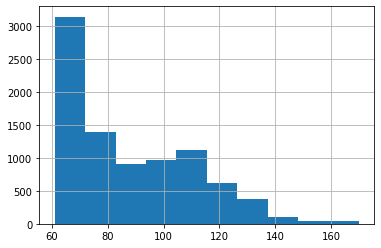

In [18]:
data = data[data['Monthly Premium Auto'] < upper_limit]
data['Monthly Premium Auto'].hist()

In [19]:
# Get categorical features.
categorical.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
